```yml
{% callout info %}
Nature and Nature's laws lay hid in night: 
God said, "Let Newton be!" and all was light.
{% endcallout %}
```

虽然我们不是每个人都像牛顿爵士一样，但借助机器学习的方法，也可以从原始的数据中得到规律。

使用TensorFlow来进行回归任务。部分素材来自[Morvan](https://github.com/MorvanZhou/Tensorflow-Tutorial/blob/master/tutorial-contents/301_simple_regression.py).


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

先定一个小目标，最终来拟合正弦函数$\sin x$：
$$
\sin x = x -\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+\dots+(-1)^n\frac{x^{2n+1}}{(2n+1)!}+o(x^{2n+2})
$$


# 简单一元回归

### 拟合二次函数

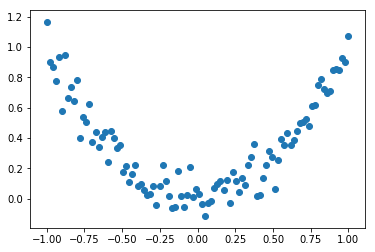

In [5]:
from math import factorial

tf.set_random_seed(1) # 让每次产生的随机数都固定
np.random.seed(1)

# God's laws
x = np.linspace(-1, 1, 100)[:, np.newaxis]
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2)+noise

plt.scatter(x, y)
plt.show()

<IPython.core.display.Javascript object>


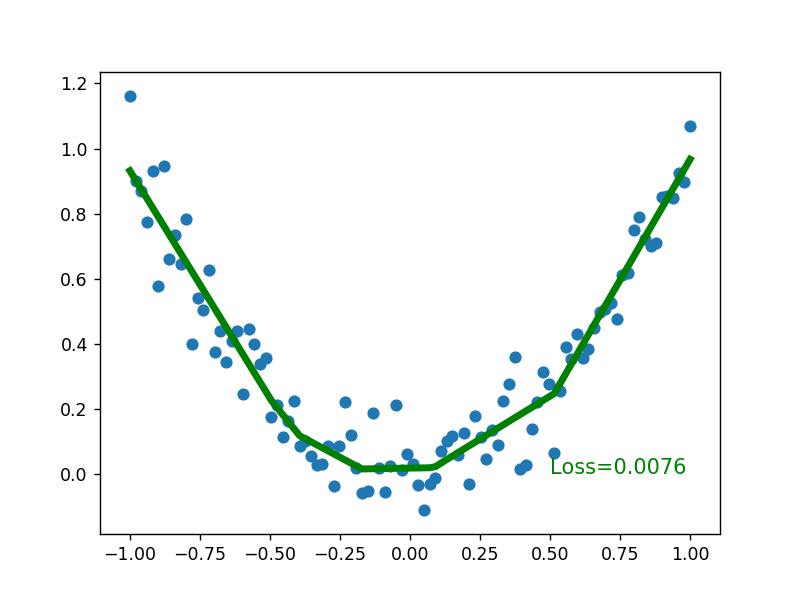

In [11]:
%matplotlib notebook
tf.set_random_seed(1) # 让每次产生的随机数都固定
np.random.seed(1)

x = np.linspace(-1, 1, 100)[:, np.newaxis]
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2)+noise

plt.scatter(x, y)
plt.show()

tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.float32, y.shape)

l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)
output = tf.layers.dense(l1, 1)

loss = tf.losses.mean_squared_error(tf_y, output)
optimizer = tf.train.GradientDescentOptimizer(0.5)
train_op = optimizer.minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

plt.ion()

for step in range(501):
    _, l, pred = sess.run([train_op, loss, output], feed_dict={tf_x:x, tf_y:y})
    if step % 50==0:
        plt.cla()
        plt.scatter(x, y)
        plt.plot(x, pred, 'g-', lw=4)
        plt.text(0.5, 0, 'Loss=%.4f'%l, fontdict={'size':12, 'color':'green'})
        plt.pause(0.1)
plt.ioff()
plt.show()